In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option("display.max_columns",None)

In [4]:
df = pd.read_csv("../Dataset/gurgaon_properties_missing_value_imputation.csv")

In [5]:
df.shape

(3554, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ardee city,sector 52,1.55,7381.0,4,4,3,1.0,Moderately Old,2100.00,0,0,0,0,0,1,0
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,2,2,1,10.0,Relatively New,577.78,0,0,0,0,0,1,15
2,flat,experion windchants,sector 112,3.65,11428.0,3,5,2,3.0,Relatively New,2800.00,0,1,0,0,0,1,72
3,flat,parsvnath exotica,sector 53,4.80,16580.0,3,4,3+,8.0,Relatively New,2500.00,0,1,0,1,1,2,174
4,flat,emaar palm gardens,sector 83,1.76,9263.0,3,3,3,6.0,Relatively New,1500.00,0,1,0,0,0,2,165


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   int64  
 6   bathroom         3554 non-null   int64  
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   int64  
 12  servant room     3554 non-null   int64  
 13  store room       3554 non-null   int64  
 14  pooja room       3554 non-null   int64  
 15  others           3554 non-null   int64  
 16  furnishing_type  3554 non-null   int64  
 17  luxury_score  

In [8]:
latlong = pd.read_csv("../Dataset/latlong.csv")

In [9]:
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [10]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [11]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [12]:
new_df = df.merge(latlong, on='sector')

In [14]:
group_df = new_df.groupby('sector').mean(numeric_only=True)[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [15]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3046.942778,28.4484,77.0210
manesar,0.962258,4608.064516,2024.788710,28.3515,76.9428
sector 1,1.860000,8249.833333,2324.835000,28.3663,76.9456
sector 102,1.695096,10628.865385,1551.594423,28.4750,76.9715
sector 103,1.495000,7445.785714,1862.315952,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.951010,5933.585859,1566.185455,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.110000,28.4153,76.9326
sector 95,0.466167,5140.466667,5805.205500,28.4172,76.9081


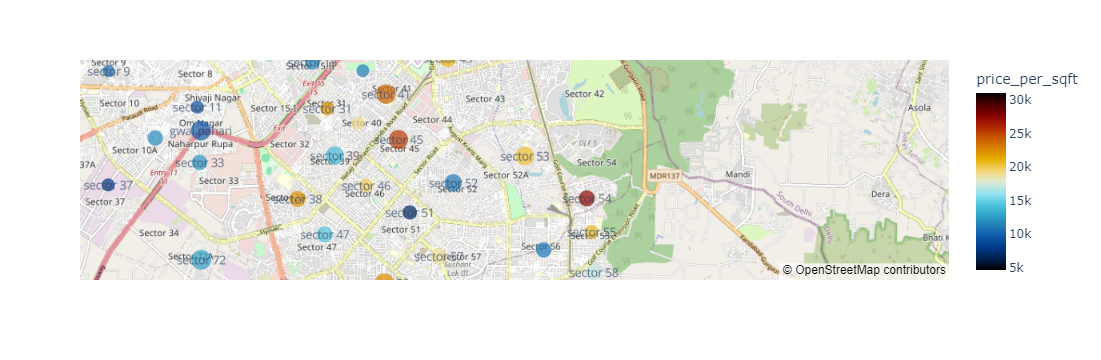

In [27]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=5,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [41]:
new_df.to_csv('../dataset/data_viz1.csv',index=False)

In [20]:
df1 = pd.read_csv("../Dataset/gurgaon_properties.csv")

In [21]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,4 BHK Flat in Sector 52 Gurgaon,flat,ardee city,1.55,7381.0,2100.0,Built Up area: 2100 (195.1 sq.m.)Carpet area: ...,4,4,3,not available,"Sector 52, Sector 52 Gurgaon, Gurgaon, Haryana",1.0,NaN,5 to 10 Year Old,NaN,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN
1,2 BHK Flat in Sector 86 Gurgaon,flat,pyramid urban homes 2,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",10.0,NaN,1 to 5 Year Old,"['Sapphire 83 Mall', 'Rampura Flyover, Naurang...",NaN,"['Lift(s)', 'Park', 'Shopping Centre']"
2,2 BHK Flat in Sohna,flat,mvn athens,0.26,5397.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2,2,1,not available,"Tower 8, Apartment No 506, Sohna, Gurgaon, Har...",5.0,NaN,1 to 5 Year Old,"['SBI ATM', 'Axis bank ATM', 'UCO bank ATM', '...","['1 Bed', '3 Fan', '1 Sofa', '7 Light', '1 Cur...","['Security / Fire Alarm', 'Power Back-up', 'Fe..."
3,3 BHK Flat in Sector 112 Gurgaon,flat,experion windchants,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3,5,2,servant room,"Sector 112 Gurgaon, Gurgaon, Haryana",3.0,South-West,1 to 5 Year Old,"['Ansal Plaza', 'Dwaraka Expressway', 'First S...","['5 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Feng Shui / Vaastu Compliant', 'Intercom Fac..."
4,3 BHK Flat in Sector 53 Gurgaon,flat,parsvnath exotica,4.80,16580.0,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up...,3,4,3+,"pooja room,servant room,others","Sector 53 Gurgaon, Gurgaon, Haryana",8.0,North-East,1 to 5 Year Old,"['Sector 53-54 Metro Station', 'Sahara Mall', ...","['9 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Centrally Air Conditioned', 'Water purifier'..."


In [25]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['sector','features']]

In [26]:
wordcloud_df.head()

,sector,features
0,sector 52,NaN
1,sector 86,"['Lift(s)', 'Park', 'Shopping Centre']"
2,sector 112,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
3,sector 53,"['Feng Shui / Vaastu Compliant', 'Intercom Fac..."
4,sector 83,"['Centrally Air Conditioned', 'Water purifier'..."


In [28]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [29]:
main

['Lift(s)',
 'Park',
 'Shopping Centre',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Piped-gas',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drai

In [31]:
from wordcloud import WordCloud

In [32]:
feature_text = ' '.join(main)

In [34]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

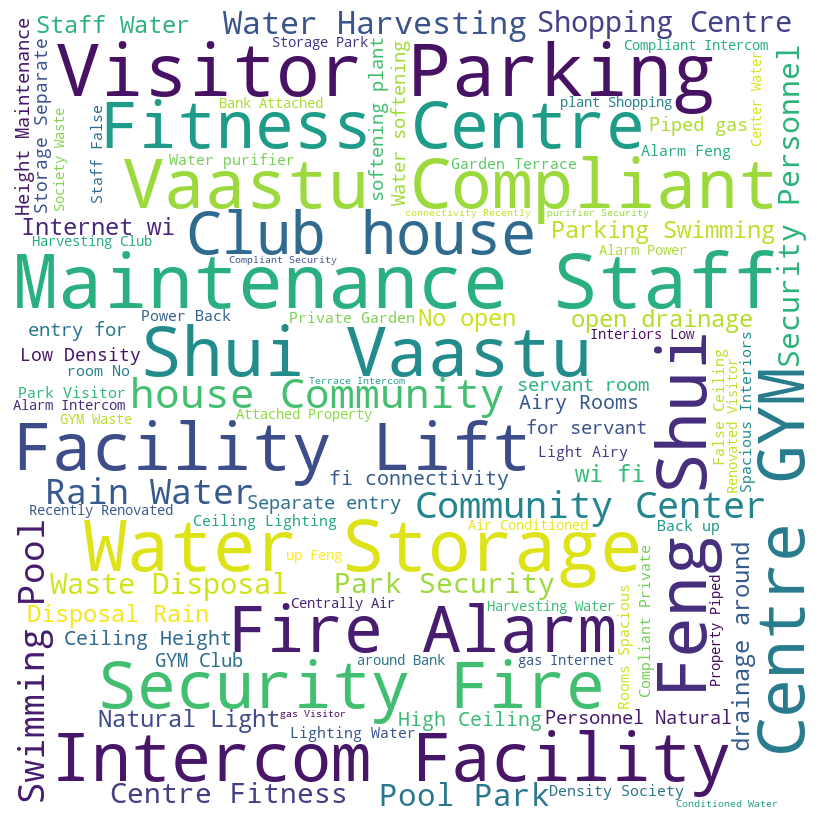

In [36]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [33]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

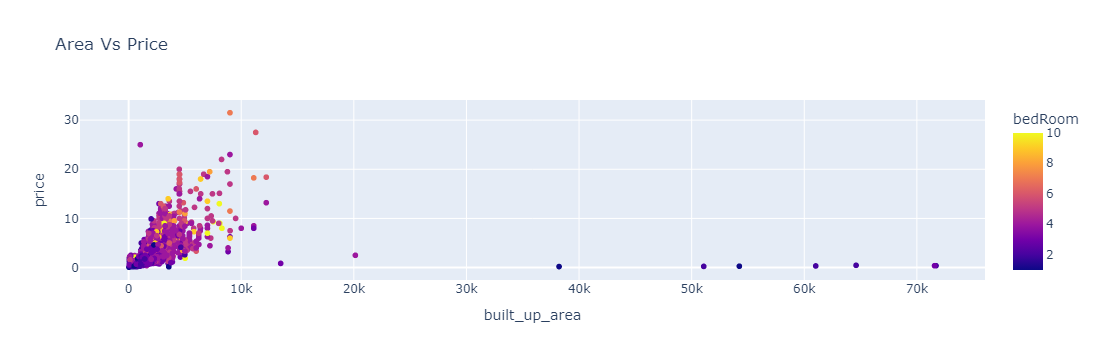

In [38]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

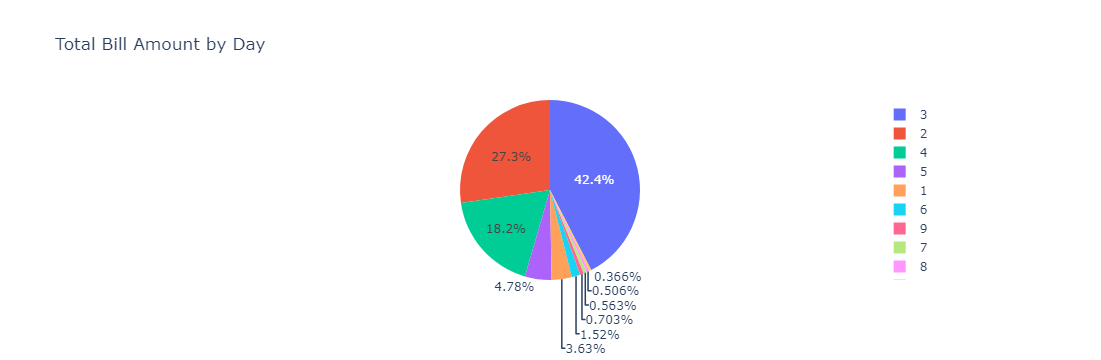

In [39]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_7684\277291874.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KIIT01\AppData\Local\Temp\ipykernel_7684\277291874.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




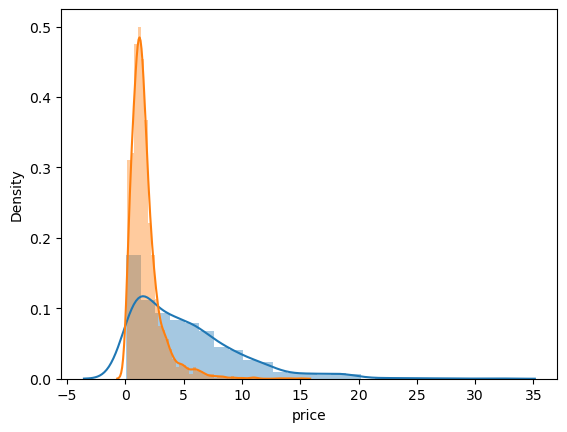

In [40]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])
plt.show()